Thực hiện import các thư viện

In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn import metrics

import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline

1. Nhập dữ liệu, thống kê các thông tin cơ bản, xử lý dữ liệu bị thiếu

In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


2. Sử dụng biểu đồ tần suất (Histogram) trong thư viện matplotlib để biểu diễn phân phối của lần lượt các thuộc tính Tuổi, Thu nhập hằng năm và Số điểm mua sắm

<ipython-input-4-824ed9131c32>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[x], bins=20)
<ipython-input-4-824ed9131c32>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[x], bins=20)
<ipython-input-4-824ed9131c32>:8: UserWarning: 

`distplot` is a deprecated function and will be rem

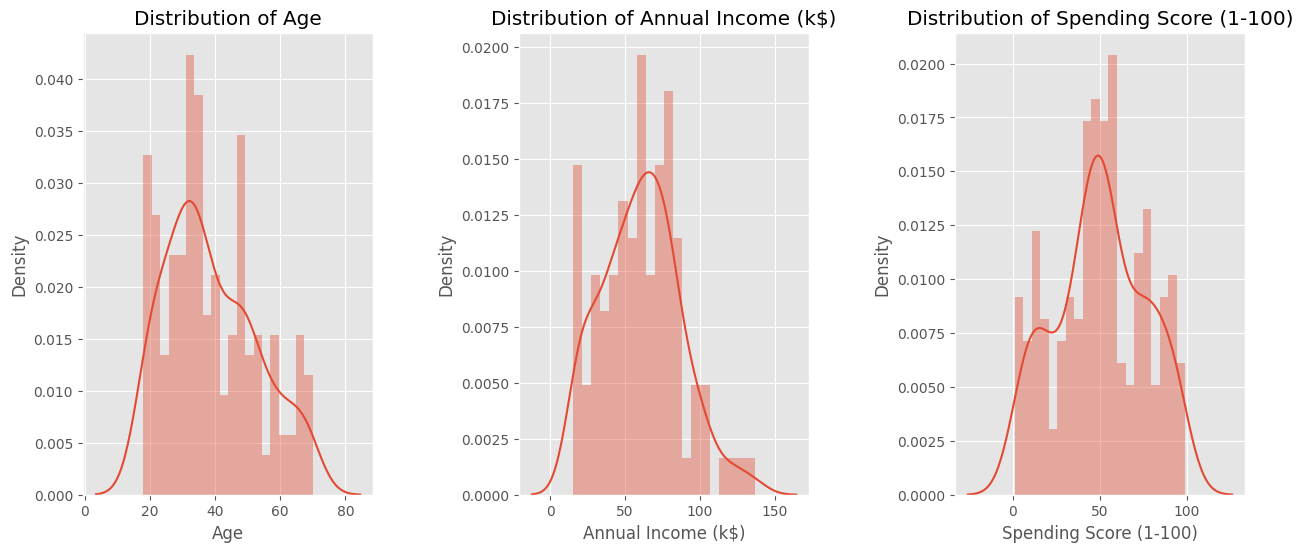

In [4]:
plt.style.use('ggplot')
plt.figure(1, figsize=(15, 6))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(data[x], bins=20)
    plt.title('Distribution of {}'.format(x))
plt.show()

3. Thống kê số mẫu dữ liệu theo giới tính

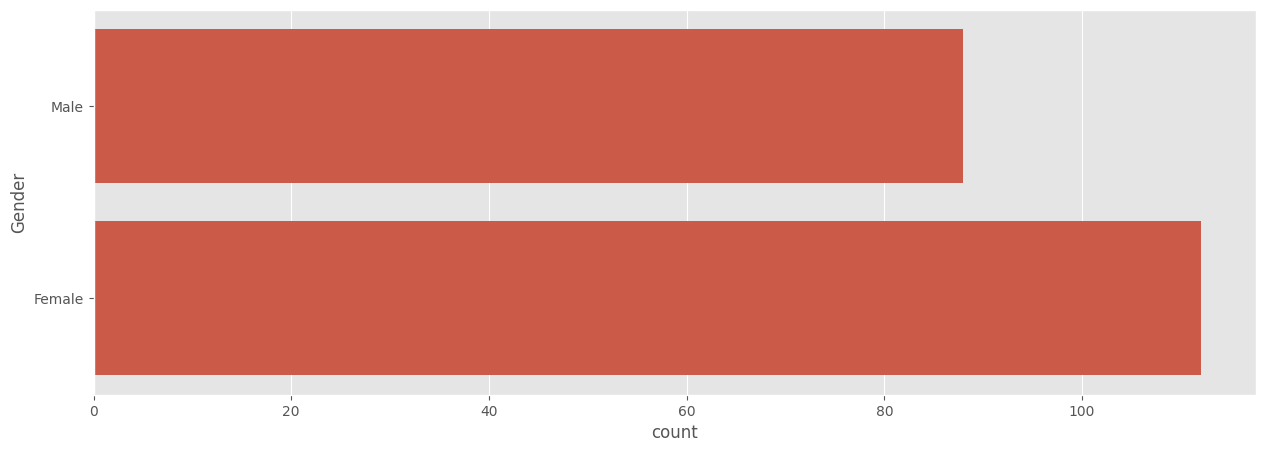

In [5]:
plt.figure(1, figsize=(15, 5))
sns.countplot(y = 'Gender', data = data)
plt.show()

4. Sử dụng biểu đồ phân tán (Scatter plot) để khảo sát phân bố của thuộc tính Tuổi và Thu nhập hằng năm theo Giới tính

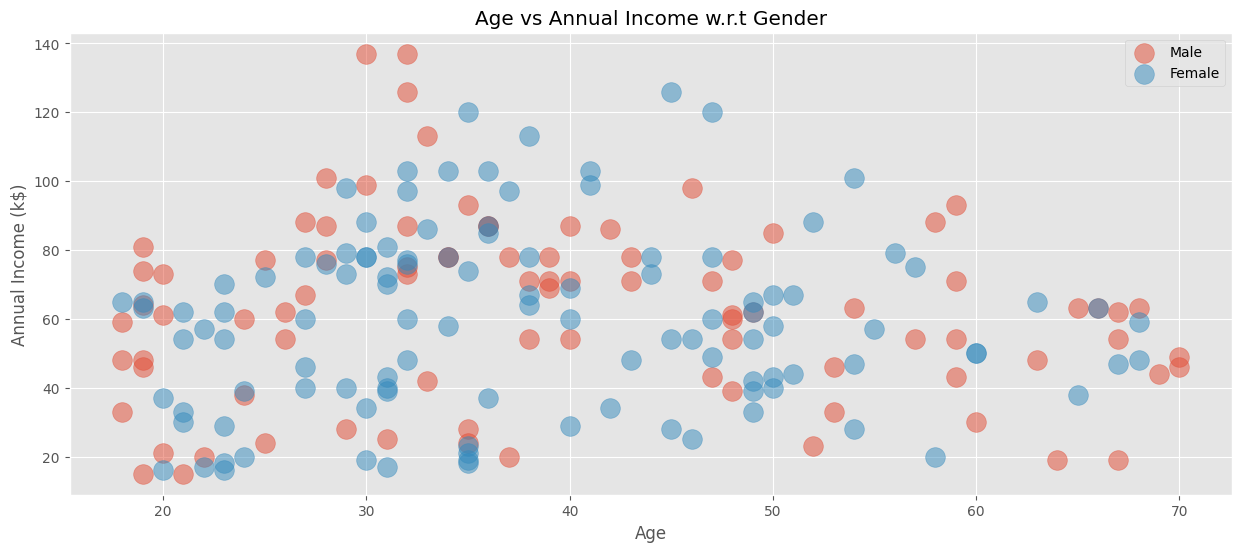

In [6]:
plt.figure(1, figsize=(15, 6))
for gender in ['Male', 'Female']:
    plt.scatter(x='Age', y='Annual Income (k$)', data=data[data['Gender']==gender], s=200, alpha=0.5, label=gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

5. Tương tự, thực hiện vẽ biểu đồ khảo sát sự phân bố của thuộc tính Thu nhập hằng năm và Số điểm mua sắm theo Giới tính

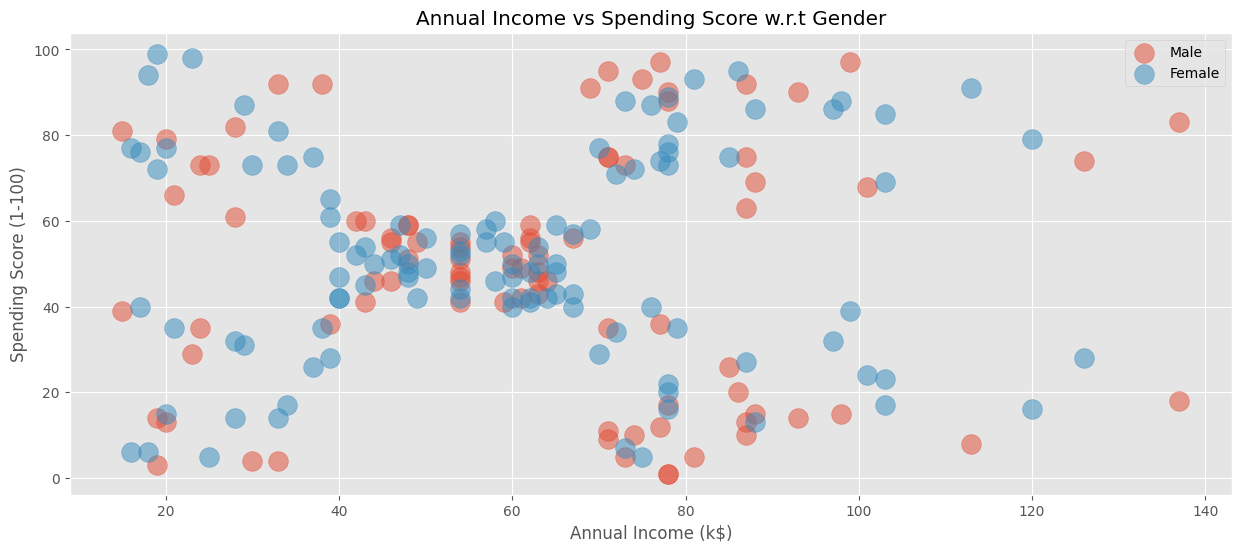

In [7]:
plt.figure(1, figsize=(15, 6))
for gender in ['Male', 'Female']:
    plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', data=data[data['Gender']==gender], s=200, alpha=0.5, label=gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

6. Sử dụng phương pháp khuỷu tay (ELBOW method) để xác định số cụm cần thiết.

In [8]:
# Khảo sát việc gom cụm theo thuộc tính Tuổi và Số điểm mua sắm
X1 = data[['Age', 'Spending Score (1-100)']].iloc[:,:].values
inertia=[]
for n in range (1,11):
    algorithm = KMeans(n_clusters =n, init='random')
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

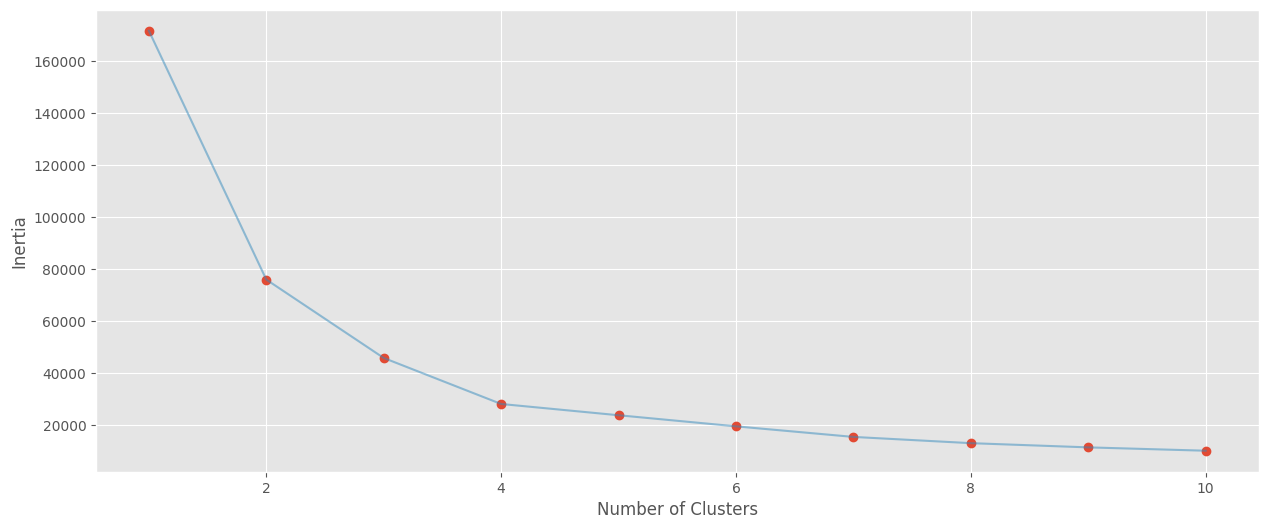

In [9]:
# Vẽ biểu đồ biểu diễn giá trị Inertia, theo từng cách gom cụm k
plt.figure(1, figsize = (15,6))
plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1,11), inertia, '-',alpha=0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

In [10]:
# Từ biểu đồ trên có thể xác nhận, số cụm tối ưu là 4 (k=4). Tiến hành gom cụm dữ liệu Tuổi và Số điểm mua sắm
algorithm = KMeans(n_clusters =4, init='random')
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


7. Biểu diễn kết quả gom cụm bằng biểu đồ

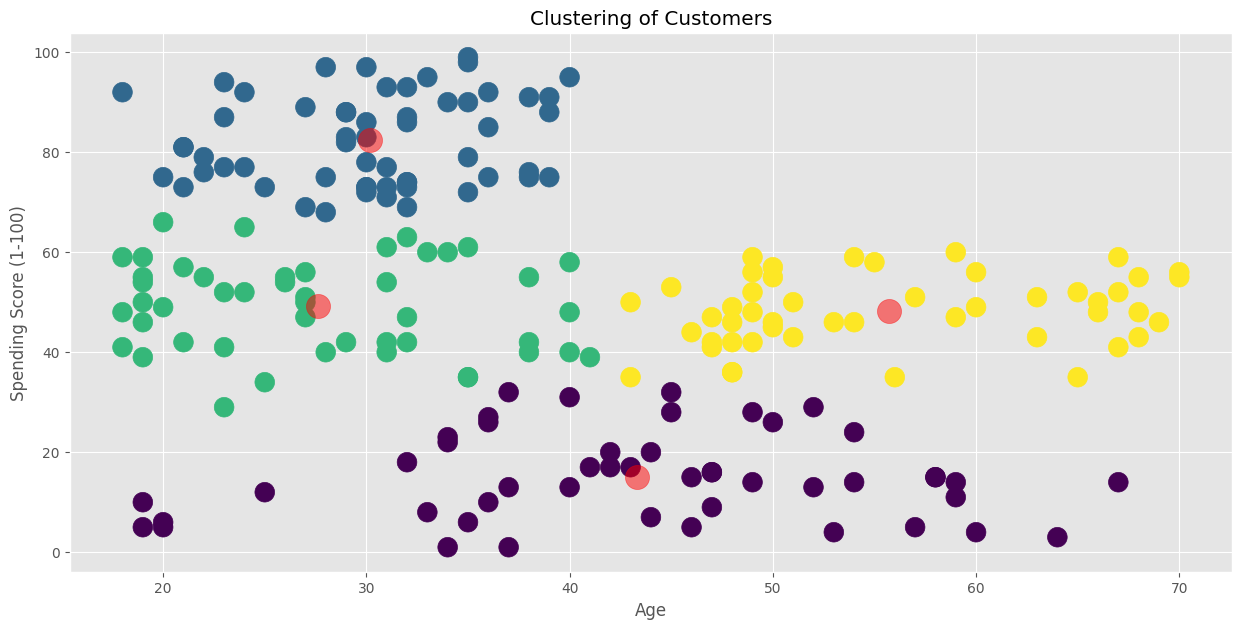

In [11]:
plt.figure(1, figsize = (15,7))
plt.clf()
plt.scatter(x='Age', y='Spending Score (1-100)', data=data, s=200, c=labels1)
plt.scatter(centroids1[:,0], centroids1[:,1], s=300, c='red', alpha=0.5)
plt.xlabel('Age'), plt.ylabel('Spending Score (1-100)')
plt.title('Clustering of Customers')
plt.show()

8. Đánh giá kết quả gom cụm bằng Hệ số Dáng điệu (Silhouette coefficient)

In [12]:
metrics.silhouette_score(X1, labels1, metric='euclidean')

0.49973941540141753

9.1 Thực hiện tương tự với trường hợp gom cụm theo các thuộc tính:
Thu nhập hằng năm và Số điểm mua sắm.
Khảo sát việc gom cụm theo thuộc tính Thu nhập hằng năm và Số điểm mua sắm

In [13]:
X2 = data[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:,:].values
inertia1=[]
for n in range (1,11):
    algorithm1 = KMeans(n_clusters =n, init='random')
    algorithm1.fit(X2)
    inertia1.append(algorithm1.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

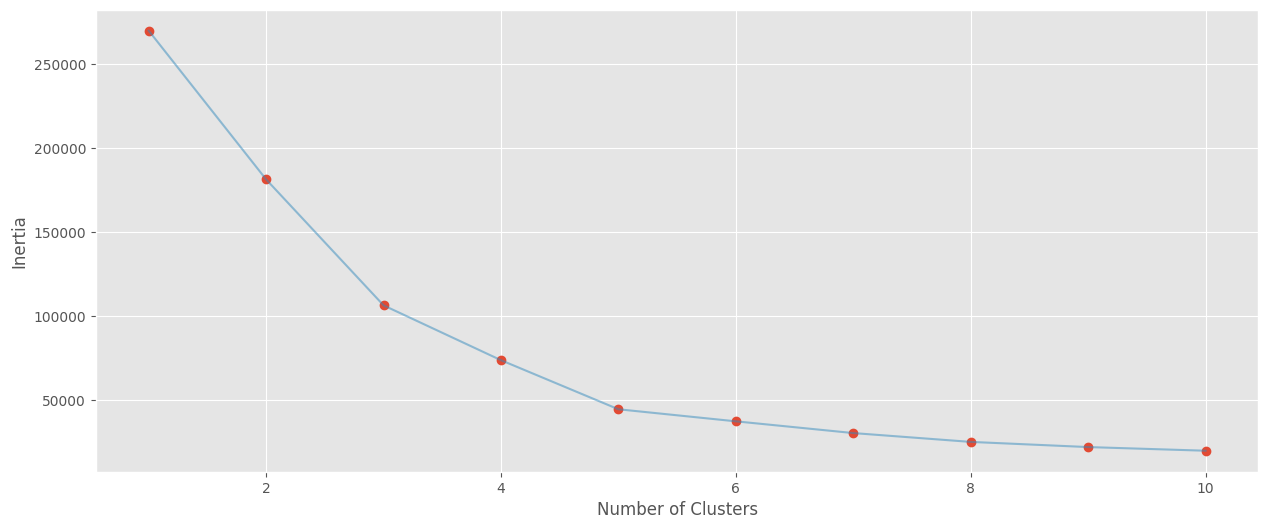

In [14]:
# Vẽ biểu đồ biểu diễn giá trị Inertia, theo từng cách gom cụm k
plt.figure(1, figsize = (15,6))
plt.plot(np.arange(1,11), inertia1, 'o')
plt.plot(np.arange(1,11), inertia1, '-',alpha=0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

In [15]:
# Từ biểu đồ trên có thể xác nhận, số cụm tối ưu là 4 (k=4)
# Tiến hành gom cụm dữ liệu Tuổi và Số điểm mua sắm
algorithm1 = KMeans(n_clusters =4, init='random')
algorithm1.fit(X2)
labels2 = algorithm1.labels_
centroids2 = algorithm1.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


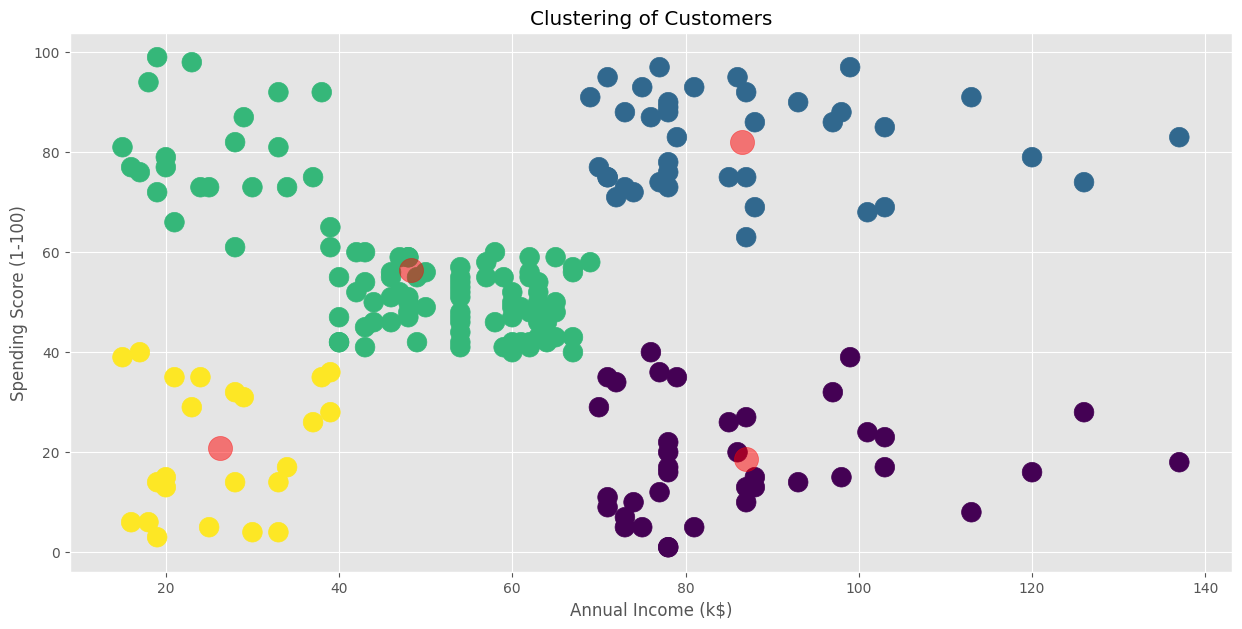

In [16]:
# Biểu diễn kết quả gom cụm bằng biểu đồ
plt.figure(1, figsize = (15,7))
plt.clf()
plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', data=data, s=200, c=labels2)
plt.scatter(centroids2[:,0], centroids2[:,1], s=300, c='red', alpha=0.5)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)')
plt.title('Clustering of Customers')
plt.show()

9.2 Sinh viên thực hiện tương tự với trường hợp gom cụm theo các thuộc tính:
Tuổi, Thu nhập hằng năm và Số điểm mua sắm.
Khảo sát việc gom cụm theo thuộc tính Tuổi, Thu nhập hằng năm và Số điểm mua sắm

In [17]:
X3 = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].iloc[:,:].values
inertia2=[]
for n in range (1,11):
    algorithm2 = KMeans(n_clusters =n, init='random')
    algorithm2.fit(X3)
    inertia2.append(algorithm2.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

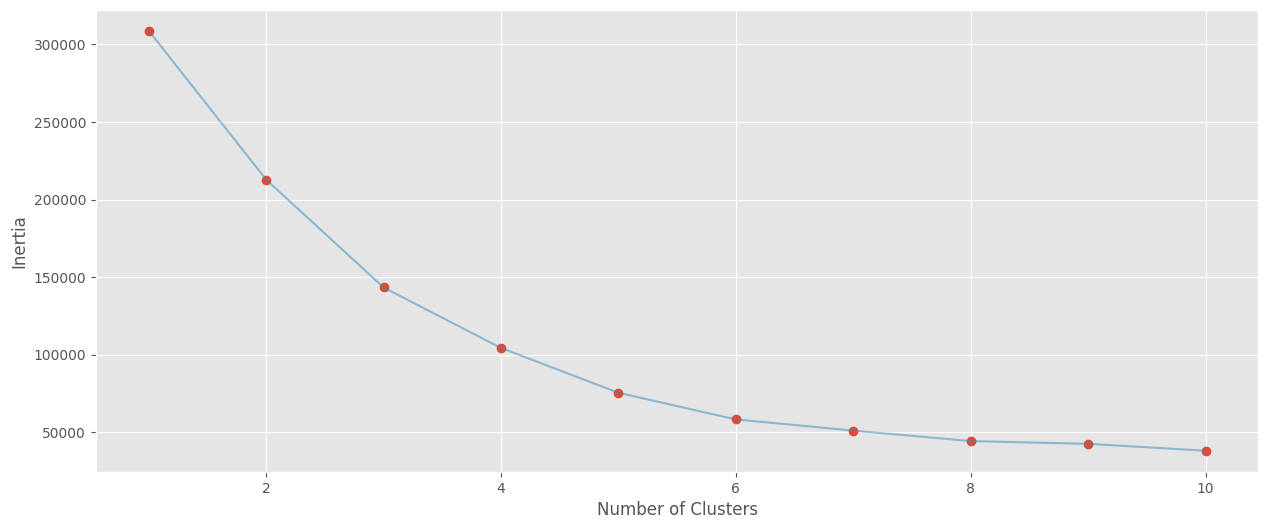

In [18]:
# Vẽ biểu đồ biểu diễn giá trị Inertia, theo từng cách gom cụm k
plt.figure(1, figsize = (15,6))
plt.plot(np.arange(1,11), inertia2, 'o')
plt.plot(np.arange(1,11), inertia2, '-',alpha=0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

In [19]:
# Từ biểu đồ trên có thể xác nhận, số cụm tối ưu là 6 (k=6)
# Tiến hành gom cụm dữ liệu Tuổi và Số điểm mua sắm
algorithm2 = KMeans(n_clusters =6, init='random')
algorithm2.fit(X3)
labels3 = algorithm2.labels_
centroids3 = algorithm2.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [20]:
# Thực hiện vẽ biểu đồ 3D, biểu diễn kết quả gom cụm Tuổi, Thu nhập hằng năm và Số điểm mua sắm
data['label3'] = labels3
trace1 = go.Scatter3d(
    x=data['Age'],
    y=data['Annual Income (k$)'],
    z=data['Spending Score (1-100)'],
    mode='markers',
    marker=dict(
        size=20,
        color=data['label3'],
        line=dict(
            color=data['label3'],
            width=12
        ),
        opacity=0.8
    )
)
dat=[trace1]
layout = go.Layout(
    title='Clustering of Customers',
    scene=dict(
        xaxis=dict(title='Age'),
        zaxis=dict(title='Spending Score (1-100)'),
        yaxis=dict(title='Annual Income (k$)'),
    )
)
fig = go.Figure(data=dat, layout=layout)
py.offline.iplot(fig)